# Chapter 3: Quantifying the Efficiency of Deep Learning

Figures and exercises for Chapter 3 of [Sustainable AI](https://www.oreilly.com/library/view/sustainable-ai/9781098155506/) by Raghavendra Selvan.

**To run locally without errors, clone the entire repository:** 

``` git clone https://github.com/raghavian/sustainable_ai.git ```

## **Section: Quantifying Resource Consumption of AI**
### **Example 3-1.** Obtaining the number of trainable parameters for a model defined in PyTorch


In [1]:
### Load the sample MLP used for AerialNIST
from sustainableai.models import MLP

### Instantiate the model
model = MLP()

# For any trainable neural network defined in the variable "model" in PyTorch:
num_param = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of trainable parameters = %d'%num_param)

Number of trainable parameters = 603396


### **Example 3-2.** Obtaining MACs for a model defined in PyTorch using [THOP: PyTorch-OpCounter](https://oreil.ly/2ICzC)

#### Install THOP package

In [ ]:
### Install THOP
!pip install thop

In [6]:
import torch
from sustainableai.models import DenseNetSmall, ViT
from thop import profile

### Sample AerialNIST sized input
input = torch.randn(1, 3, 28, 28)

densenet_model = DenseNetSmall()
vit_model = ViT()

macs_dn, params_dn = profile(densenet_model, inputs=(input, ))
macs_vt, params_vt = profile(vit_model, inputs=(input, ))
print('MAC for DenseNet = %.2fM'%(macs_dn/1e6))
print('MAC for ViT model = %.2fM'%(macs_vt/1e6))


[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register count_avgpool() for <class 'torch.nn.modules.pooling.AvgPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
MAC for DenseNet = 35.34M
MAC for ViT model = 9.36M


### **Example 3-3.** Obtaining FLOP count for a model defined in PyTorch using [fvcore](https://oreil.ly/xeOR_) maintained by the computer vision team at META AI Research

#### Install fvcore package

In [ ]:
### Install fvcore package
!pip install fvcore

In [8]:
import torch
from sustainableai.models import DenseNetSmall, ViT
from fvcore.nn import FlopCountAnalysis

### Sample AerialNIST sized input
input = torch.randn(1, 3, 28, 28)

densenet_model = DenseNetSmall()
vit_model = ViT()

flop_dn = FlopCountAnalysis(densenet_model, input)
flop_vt = FlopCountAnalysis(vit_model, input)

print('FLOP count for DenseNet = %.2fM'%(flop_dn.total()/1e6))
print('FLOP count for ViT model = %.2fM'%(flop_vt.total()/1e6))


Unsupported operator aten::add_ encountered 27 time(s)
Unsupported operator aten::avg_pool2d encountered 2 time(s)
Unsupported operator aten::add encountered 9 time(s)
Unsupported operator aten::div encountered 4 time(s)
Unsupported operator aten::mul encountered 16 time(s)
Unsupported operator aten::scaled_dot_product_attention encountered 4 time(s)
Unsupported operator aten::gelu encountered 4 time(s)
The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python methods. In the latter case they will have zeros for statistics, though their statistics will still contribute to their parent calling module.
blocks.0.attn.out_proj, blocks.1.attn.out_proj, blocks.2.attn.out_proj, blocks.3.attn.out_proj


FLOP count for DenseNet = 35.80M
FLOP count for ViT model = 13.86M


### **Example 3-4.** Runtime and latency can be measured by wrapping the built-in time module in Python

In [11]:
# Import the time module
import time
latency_start_time = time.time() # Get the time at the start of code
# Initial code that is used to setup data, models
runtime_start_time = time.time() # Get time at start of model computations
# Prediction code on new data
runtime_end_time = time.time() # Get time at end of model computations
runtime = runtime_end_time - runtime_start_time
# Postprocessing, visualisation, garbage collection
latency_end_time = time.time() # Get time (almost) at end of code
latency = latency_end_time - latency_start_time
print('Runtime = %.4f s'%(runtime))
print('Latency = %.4f s'%(latency))

Runtime = 0.0001 s
Latency = 0.0003 s


### **Example 3-5.** Obtaining the total energy consumption due to CPU, GPU, and DRAM costs for training a model defined in PyTorch using [pyJoules](https://oreil.ly/v0Rls)

#### Install pyJoules

In [12]:
### Install pyJoules
!pip install pyjoules

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 32.7 MB/s eta 0:00:00


#### Root Privileges to Read CPU Power Consumption
Most software energy measurement tools, such as pyJoules, rely on the intel-rapl library for querying the instantaneous power consumption of Intel CPUs and DRAM. In Linux machines, as a security measure, reading these values requires root privileges. See possible solutions [here](https://oreil.ly/jfpbW).

In [24]:
# Import the relevant functions from pyJoules
from pyJoules.energy_meter import measure_energy
from pyJoules.handler.pandas_handler import PandasHandler
import time

# Instantiate output handler to be Pandas dataframe
pandas_handler = PandasHandler()
@measure_energy(handler=pandas_handler) # decorate main() with energy meter
def main():
    # Main function code goes here...
    time.sleep(10)
    return 
    
if __name__ == "__main__":
    main()
    df = pandas_handler.get_dataframe() # Get the measured energy as a dataframe
    print(df)
    print('Total time elapsed: %.4f s'%(df['duration'].values[0]))
    for c in df.columns[4:]: # Loop over detected devices
        print('Energy consumption of '+c+' : %.4f J'%(df[c].values[0]/1e6))

      timestamp   tag   duration    package_0      dram_0      core_0  \
0  1.760457e+09  main  30.031299  113029007.0  35469758.0  44494515.0   

    uncore_0  
0  4464649.0  
Total time elapsed: 30.0313 s
Energy consumption of dram_0 : 35.4698 J
Energy consumption of core_0 : 44.4945 J
Energy consumption of uncore_0 : 4.4646 J


## **Section: Carbon Footprint of AI Models**
### **Figure 3-4.** Carbon intensity fluctuations for Denmark (DK) and Great Britain (GB) over a period of one year, shown as daily averages. (Source: [DK](https://energidataservice.dk), [GB](https://carbonintensity.org.uk))

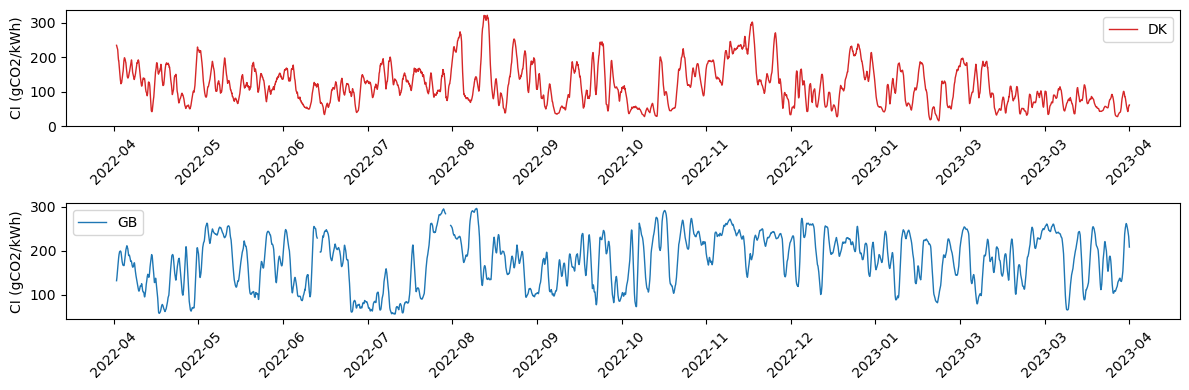

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb

def process_data(loc,D=365,N=24*24,delim=','):
    data = pd.read_csv(loc,delimiter=delim,decimal=',') # Load data
    T = data.shape[0]
    data = data[:D*N][::-1]
    co2 = data.CO2Emission.astype(float)
    co2_smo = np.convolve(co2, np.ones(N)/N, mode='valid')
    xRange = np.arange(len(co2))
    xData = np.array(data.TimeUTC)
    return co2, co2_smo, xRange, xData

DATA =['../data/ch03_CO2Emis.csv',
        '../data/ch03_Carbon_Intensity_Data.csv']

N_vals = [24*24,24*2]
delims = [';',',']
colors = ['tab:red','tab:blue']
labels = ['DK','GB']
D = 365
plt.figure(figsize=(12,4))
i = 0
xMax = 0
for loc,N,delim,c,l in zip(DATA,N_vals,delims,colors,labels):
    co2, co2_smo, xRange, xData = process_data(loc=loc,D=D,N=N,delim=delim)
    if i != 0:
        xRange = np.linspace(0,xMax,len(co2))
    else:
        xMax = xRange[-1]
        xticks = xData[np.linspace(0,xMax,13).astype(int)]
        xticks = [x.split(' ')[0][:-3] for x in xticks]

    i += 1
    plt.subplot(2,1,i)
#    plt.plot(xRange,co2,alpha=0.4,linewidth=0.2,color='tab:grey')
    plt.plot(xRange[N-1:], co2_smo,linewidth=1.0,color=c,label=l)

    #print("Loaded data with %d entries"%len(data))
    plt.xticks(np.linspace(0,xMax,13),xticks,
        rotation=45)
    plt.legend()
    plt.ylabel('CI (gCO2/kWh)')
plt.tight_layout()

### Example 3-6. Obtaining the carbon footprint due to the energy consumption of CPU,GPU, and DRAM when training a model defined in PyTorch using [Carbontracker](https://carbontracker.info/)

#### Install carbontracker


In [ ]:
### Install carbontracker
!pip install carbontracker

In [35]:
from carbontracker.tracker import CarbonTracker
import time

tracker = CarbonTracker(epochs=1)
for epoch in range(2):
    tracker.epoch_start()
    # Your model training.
    time.sleep(10)
    tracker.epoch_end()
tracker.stop()

CarbonTracker: The following components were found: CPU with device(s) dram:0, cpu:0.
CarbonTracker: WARNING - ElectricityMaps API key not set. Will default to average carbon intensity.
CarbonTracker: WARNING - Failed to retrieve carbon intensity: Defaulting to average carbon intensity 151.6503 gCO2/kWh.
CarbonTracker: WARNING - ElectricityMaps API key not set. Will default to average carbon intensity.
CarbonTracker: WARNING - Failed to retrieve carbon intensity: Defaulting to average carbon intensity 151.6503 gCO2/kWh.
CarbonTracker: Live carbon intensity could not be fetched at detected location: Copenhagen, Capital Region, DK. Defaulted to average carbon intensity for DK in 2023 of 151.65 gCO2/kWh. at detected location: Copenhagen, Capital Region, DK.
CarbonTracker: 
Predicted consumption for 1 epoch(s):
	Time:	0:00:10
	Energy:	0.000010782598 kWh
	CO2eq:	0.001635184180 g
	This is equivalent to:
	0.000015211016 km travelled by car
CarbonTracker: WARNING - ElectricityMaps API key not 